# Covid-19 Future Forecasting using ML Methods

In [ ]:
#list of useful imports that  I will use
%matplotlib inline
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image 
import tensorflow as tf


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data_1 = pd.read_csv("/content/drive/MyDrive/Covid-19_ML/time_series_covid19_confirmed_US.csv")
data_confirmed = pd.read_csv("/content/drive/MyDrive/Covid-19_ML/time_series_covid19_confirmed_global.csv")
#data_de = pd.read_csv("/content/drive/MyDrive/Covid-19_ML/time_series_covid19_deaths_US.csv")
data_deaths = pd.read_csv("/content/drive/MyDrive/Covid-19_ML/time_series_covid19_deaths_global.csv")
data_recovered = pd.read_csv("/content/drive/MyDrive/Covid-19_ML/time_series_covid19_recovered_global.csv")

In [ ]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163


In [ ]:
data_confirmed.shape

(273, 389)

In [ ]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2191,2191,2191,2237,2244,2244,2253,2257,2264,2277,2288,2301,2301,2314,2324,2336,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1181,1190,1193,1199,1210,1217,1223,1230,1233,1241,1247,1252,1256,1261,1265,1270,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2762,2769,2772,2777,2782,2786,2792,2798,2803,2807,2812,2816,2819,2822,2827,2831,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84,84,84,84,84,84,84,84,85,85,85,86,87,88,88,91,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,405,407,408,408,410,413,413,415,416,416,420,422,424,425,428,431,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478


In [ ]:
data_deaths.shape

(273, 389)

In [ ]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41727,41727,41727,42530,42666,42666,43291,43440,43740,43948,44137,44608,44850,45298,45434,45465,45868,46359,46554,46759,46887,46912,46943,47298,47365,47459,47549,47583,47606,47609,47679,47723,47798,47982,47995,48018,48027,48041,48042,48109
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33634,34353,34648,34996,35551,36102,36535,36971,37327,37648,37981,38421,38860,39246,39625,40090,40453,40870,41464,41969,42426,42895,43384,43890,44291,44880,45383,45906,46420,46927,47424,47922,48377,48958,49543,50219,50875,51444,52128,52933
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67395,67611,67808,67999,68185,68383,68589,68802,69011,69212,69403,69608,69791,69992,70188,70373,70554,70747,70933,71127,71343,71552,71755,71945,72143,72336,72538,72745,72956,73152,73344,73530,73732,73940,74136,74330,74330,74692,74871,75057
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7463,7463,7517,7548,7585,7615,7615,7724,7724,7724,7724,7930,8070,8091,8116,8116,8154,8154,8349,8399,8474,8537,8588,8652,8724,8774,8851,8942,8986,9045,9093,9206,9252,9313,9395,9444,9492,9533,9610,9674
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11146,11189,11223,11266,11376,11477,11955,12712,13205,13872,14825,15512,15631,16008,16120,16225,16347,16677,16822,16921,17176,17223,17249,17266,17327,17388,17602,17692,17918,18015,18035,18180,18232,18335,18381,18431,18475,18540,18596,18623


In [ ]:
data_recovered.shape

(258, 389)

In [ ]:
data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 389 entries, Province/State to 2/9/21
dtypes: float64(2), int64(385), object(2)
memory usage: 829.8+ KB


In [ ]:
data_confirmed = data_confirmed.fillna(0)
data_deaths = data_deaths.fillna(0)
data_recovered = data_recovered.fillna(0)

In [ ]:
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 389 entries, Province/State to 2/9/21
dtypes: float64(2), int64(385), object(2)
memory usage: 829.8+ KB


In [ ]:
data_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Columns: 389 entries, Province/State to 2/9/21
dtypes: float64(2), int64(385), object(2)
memory usage: 784.2+ KB


In [ ]:
data_recovered["Country/Region"].value_counts()

China                  33
France                 12
United Kingdom         11
Australia               8
Netherlands             5
                       ..
Trinidad and Tobago     1
Gambia                  1
West Bank and Gaza      1
Afghanistan             1
Libya                   1
Name: Country/Region, Length: 192, dtype: int64

In [ ]:
data_confirmed["Country/Region"].value_counts()

China                  33
Canada                 16
France                 12
United Kingdom         11
Australia               8
                       ..
Trinidad and Tobago     1
Gambia                  1
West Bank and Gaza      1
Afghanistan             1
Libya                   1
Name: Country/Region, Length: 192, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


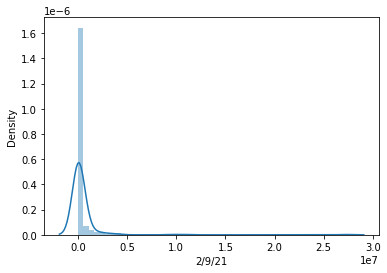

In [ ]:
sns.distplot(data_confirmed['2/9/21'])  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


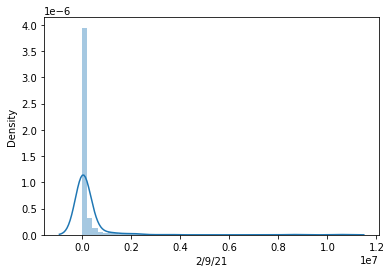

In [ ]:
sns.distplot(data_recovered['2/9/21'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


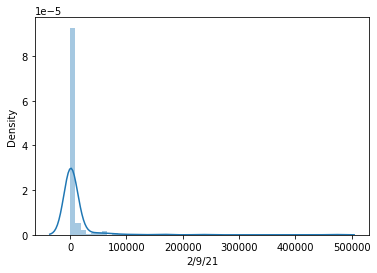

In [ ]:
sns.distplot(data_deaths['2/9/21'])

In [ ]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163


In [ ]:
data_confirmed = data_confirmed.drop(['Province/State'],axis = 1)
data_deaths = data_deaths.drop(['Province/State'],axis = 1)
data_recovered = data_recovered.drop(['Province/State'],axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_confirmed['Country/Region'] = le.fit_transform(data_confirmed['Country/Region'])
data_deaths['Country/Region'] = le.fit_transform(data_deaths['Country/Region'])
data_recovered['Country/Region'] = le.fit_transform(data_recovered['Country/Region'])

In [ ]:
data_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,0,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384
1,1,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528
2,2,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559
3,3,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312
4,4,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163


In [ ]:
data_confirmed = data_confirmed.fillna(0)
data_deaths = data_deaths.fillna(0)
data_recovered = data_recovered.fillna(0)

In [ ]:
data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 388 entries, Country/Region to 2/9/21
dtypes: float64(2), int64(386)
memory usage: 827.7 KB


In [ ]:
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 388 entries, Country/Region to 2/9/21
dtypes: float64(2), int64(386)
memory usage: 827.7 KB


In [ ]:
data_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Columns: 388 entries, Country/Region to 2/9/21
dtypes: float64(2), int64(386)
memory usage: 782.2 KB


## Recovered Data

In [ ]:
x_recovered = data_recovered.drop(['2/9/21'],axis=1).values
y_recovered = data_recovered['2/9/21'].values

In [ ]:
print(x_recovered.shape) 
print(y_recovered.shape)

(258, 387)
(258,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_recovered ,X_test_recovered ,Y_train_recovered ,Y_test_recovered  = train_test_split(x_recovered , y_recovered,test_size=0.3,random_state=False)
scaler = StandardScaler()
x_train_recovered  = scaler.fit_transform(X_train_recovered )
x_test_recovered  = scaler.transform(X_test_recovered )
y_train_recovered  = scaler.fit_transform(Y_train_recovered .reshape(-1,1))
y_test_recovered  = scaler.transform(Y_test_recovered .reshape(-1,1))

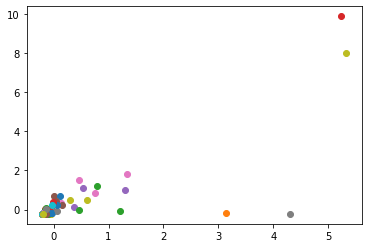

In [ ]:
for i in range(x_train_recovered .shape[0]):
    plt.scatter(np.mean(x_train_recovered [i]),y_train_recovered [i].ravel())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
linear=LinearRegression()
linear.fit(x_train_recovered ,y_train_recovered )
#pickle.dump(linear,open('E:\\LR.sav','wb'))
y_pred_recovered =linear.predict(x_test_recovered )
y_final=[]
print(mean_squared_error(y_pred_recovered ,y_test_recovered ))
y_true=list(scaler.inverse_transform(y_pred_recovered).ravel())
for y in y_true:
    y_final.append(round(y,2))
Date=[]
for y in y_final:
    Date.append(data_recovered['2/9/21'].values[y_final.index(y)])

2.6747401802729136e-05


Figure(1080x720)
[-0.0, 82.06, 80.37, 84.94, 0.0, 1541.18, -170.55, 17.23, 58.36, 164.51]
[1317474      16     850    3891  150544    2451     115 1122912       0
   54233]


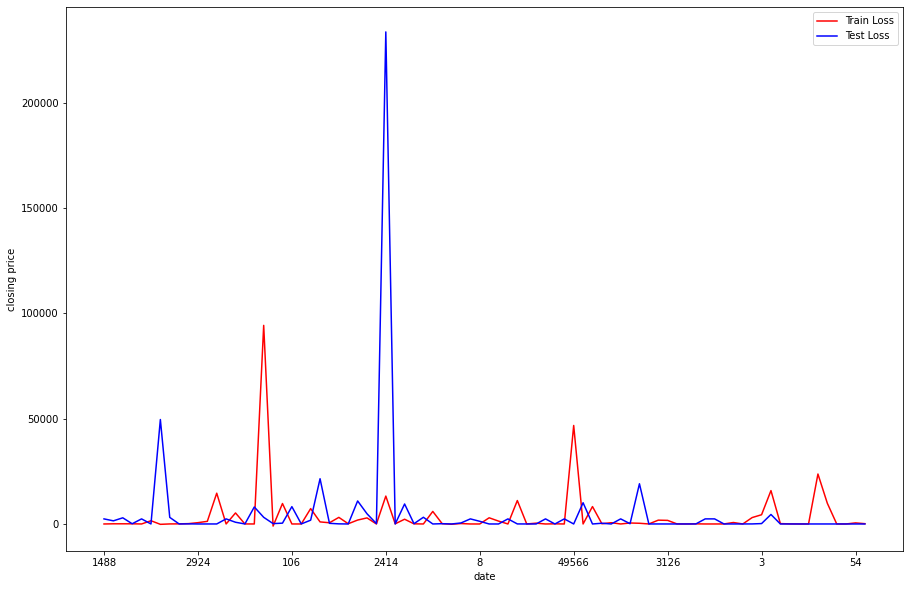

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)

date=Date[:-1]

plt.plot(y_final, 'r')
plt.plot(Date, 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})

plt.xlabel('for predicted data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)
print(y_final[:15])
print(Y_test_recovered[:10])

plt.show()

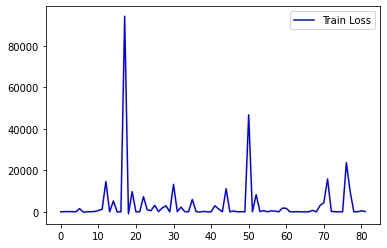

In [ ]:
# plot the accuracy plot
#plt.plot(y_final, 'r')
plt.plot(y_true, 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show() 

In [ ]:
from sklearn.svm import SVR

In [ ]:
sup=SVR()
sup.fit(x_train_recovered ,y_train_recovered .ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_recovered =sup.predict(x_test_recovered )

In [ ]:
y_final=[]
print(mean_squared_error(y_pred_recovered ,y_test_recovered ))
y_true=list(scaler.inverse_transform(y_pred_recovered ).ravel())
print(Y_test_recovered [:10])
for y in y_true:
    y_final.append(round(y,2))
print(y_final[:10])

0.11275078075268355
[1317474      16     850    3891  150544    2451     115 1122912       0
   54233]
[1086012.08, 95255.91, 96541.21, 90643.64, 213058.07, 94035.87, 102089.71, 834476.97, 95854.95, 123779.53]


In [ ]:
results = pd.DataFrame( columns = ['Data Type','Algorithm','mean_squared_error'])
new1 = ['Recovered Data', 'Linear Regression',2.83]
new2 = ['Recovered Data', 'SVM',0.11]
results.loc[0] = new1
results.loc[1] = new2


## Covid-19 Confirmed Data

In [ ]:
data_confirmed

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21
0,0,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384
1,1,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528
2,2,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559
3,3,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312
4,4,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,187,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1474,1482,1494,1497,1504,1505,1509,1512,1513,1514,1515,1520,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064
269,188,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,139223,140287,141219,142228,143169,144257,145252,146074,146701,147400,148171,148968,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975
270,189,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2101,2101,2101,2101,2101,2102,2104,2104,2104,2104,2105,2107,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131
271,190,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20997,21230,21582,21993,22645,23495,24297,25326,26567,27728,28596,29757,31100,32800,34278,36074,37605,38207,39515,40949,42213,43333,44592,45337,46146,47622,48911,50319,51624,53352,54217,55042,56233,57489,59003,

In [ ]:
x_confirmed = data_confirmed.drop(['2/9/21'],axis=1).values
y_confirmed = data_confirmed['2/9/21'].values

In [ ]:
print(x_confirmed.shape) 
print(y_confirmed.shape)

(273, 387)
(273,)


In [ ]:
X_train_confirmed ,X_test_confirmed ,Y_train_confirmed ,Y_test_confirmed  = train_test_split(x_confirmed , y_confirmed,test_size=0.3,random_state=False)
scaler = StandardScaler()
x_train_confirmed  = scaler.fit_transform(X_train_confirmed)
x_test_confirmed  = scaler.transform(X_test_confirmed )
y_train_confirmed  = scaler.fit_transform(Y_train_confirmed .reshape(-1,1))
y_test_confirmed  = scaler.transform(Y_test_confirmed .reshape(-1,1))

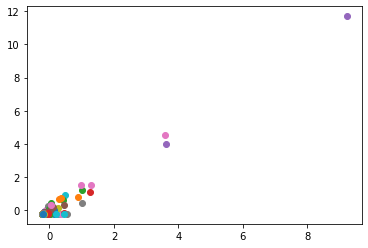

In [ ]:
for i in range(x_train_confirmed .shape[0]):
    plt.scatter(np.mean(x_train_confirmed [i]),y_train_confirmed [i].ravel())

In [ ]:
linear=LinearRegression()
linear.fit(x_train_confirmed ,y_train_confirmed )
#pickle.dump(linear,open('E:\\LR.sav','wb'))
y_pred_confirmed =linear.predict(x_test_confirmed )
y_pred=[]
print(mean_squared_error(y_pred_confirmed ,y_test_confirmed ))
y_pred = list(scaler.inverse_transform(y_pred_confirmed).ravel())


0.008907955178221433


In [ ]:
y_pred = list(scaler.inverse_transform(y_pred_confirmed).ravel())

y_actual = []
for i in Y_test_confirmed:
  y_actual.append(i)


y_pred_g = []
for y in y_pred:
  y_pred_g.append(round(y,2))

In [ ]:
y_actual[:10]

[2, 4190, 3801, 5614, 4, 85171, 231, 1385, 4989, 4643]

In [ ]:
y_pred_g[:10]

[1233.75,
 1314.19,
 1305.39,
 1356.23,
 1233.72,
 2833.13,
 1202.62,
 1260.53,
 1323.08,
 1322.29]

Figure(1080x720)
[4.83, 4260.27, 3794.88, 6484.47, 3.5, 84616.97, -1641.78, 1421.72, 4730.93, 4689.0]
[    2  4190  3801  5614     4 85171   231  1385  4989  4643]


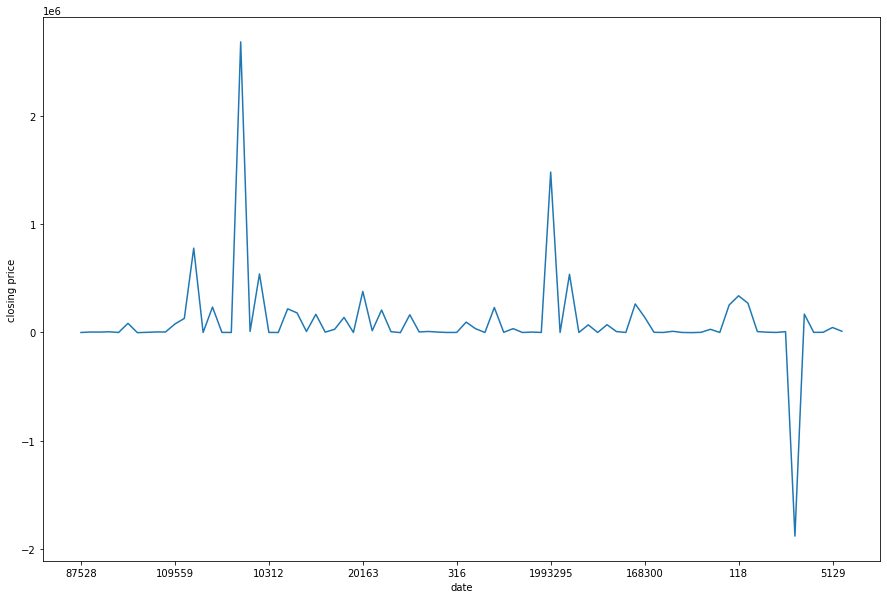

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)
close=y_final
date=Date[:-1]
plt.plot(y_final)
plt.xlabel('for predicted data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)
print(y_final[:10])
print(Y_test_confirmed[:10])

In [ ]:
sup=SVR()
sup.fit(x_train_confirmed ,y_train_confirmed .ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_final=[]
print(mean_squared_error(y_pred_confirmed ,y_test_confirmed ))
y_true=list(scaler.inverse_transform(y_pred_confirmed ).ravel())
print(Y_test_confirmed [:10])
for y in y_true:
    y_final.append(round(y,2))
print(y_final[:10])

0.008907955178221433
[    2  4190  3801  5614     4 85171   231  1385  4989  4643]
[4.83, 4260.27, 3794.88, 6484.47, 3.5, 84616.97, -1641.78, 1421.72, 4730.93, 4689.0]


In [ ]:
new1 = ['Confirmed Data', 'Linear Regression',0.008]
new2 = ['Confirmed Data', 'SVM',0.008]
results.loc[2] = new1
results.loc[3] = new2

## Covid-19 Deaths Data

In [ ]:
x_deaths = data_deaths.drop(['2/9/21'],axis=1).values
y_deaths = data_deaths['2/9/21'].values

In [ ]:
print(x_deaths.shape) 
print(y_deaths.shape)

(273, 387)
(273,)


In [ ]:
X_train_deaths ,X_test_deaths ,Y_train_deaths ,Y_test_deaths  = train_test_split(x_deaths , y_deaths,test_size=0.3,random_state=False)
scaler = StandardScaler()
x_train_deaths  = scaler.fit_transform(X_train_deaths)
x_test_deaths  = scaler.transform(X_test_deaths )
y_train_deaths  = scaler.fit_transform(Y_train_deaths .reshape(-1,1))
y_test_deaths  = scaler.transform(Y_test_deaths.reshape(-1,1))

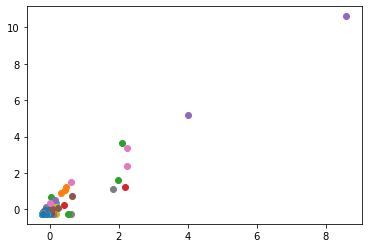

In [ ]:
for i in range(x_train_deaths .shape[0]):
    plt.scatter(np.mean(x_train_deaths [i]),y_train_deaths [i].ravel())

In [ ]:
linear=LinearRegression()
linear.fit(x_train_deaths ,y_train_deaths )
#pickle.dump(linear,open('E:\\LR.sav','wb'))
y_pred_deaths =linear.predict(x_test_deaths )
y_final=[]
print(mean_squared_error(y_pred_deaths ,y_test_deaths ))
y_true=list(scaler.inverse_transform(y_pred_deaths).ravel())
for y in y_true:
    y_final.append(round(y,2))
Date=[]
for y in y_final:
    Date.append(data_deaths['2/9/21'].values[y_final.index(y)])

0.0024655876416411603


Figure(1080x720)
[-0.0, 82.06, 80.37, 84.94, 0.0, 1541.18, -170.55, 17.23, 58.36, 164.51]
[   0   83   79   87    0 1433    2   18   63  167]


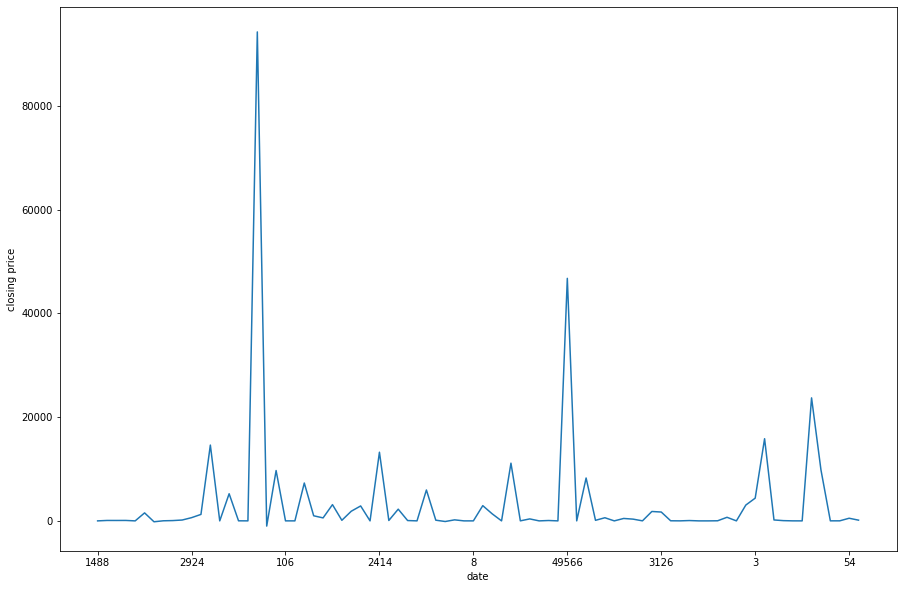

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
print(fig)
close=y_final
date=Date[:-1]
plt.plot(y_final)
plt.xlabel('for predicted data')
plt.xlabel('date')
plt.ylabel('closing price')
ax.set_xticklabels(date)
print(y_final[:10])
print(Y_test_deaths[:10])

In [ ]:
sup=SVR()
sup.fit(x_train_deaths ,y_train_deaths .ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_final=[]
print(mean_squared_error(y_pred_deaths ,y_test_deaths ))
y_true=list(scaler.inverse_transform(y_pred_deaths ).ravel())
print(Y_test_deaths [:10])
for y in y_true:
    y_final.append(round(y,2))
print(y_final[:10])

0.0024655876416411603
[   0   83   79   87    0 1433    2   18   63  167]
[-0.0, 82.06, 80.37, 84.94, 0.0, 1541.18, -170.55, 17.23, 58.36, 164.51]


In [ ]:
new1 = ['Deaths Data', 'Linear Regression',0.002]
new2 = ['Deaths Data', 'SVM',0.002]
results.loc[4] = new1
results.loc[5] = new2

### Performance Table

In [ ]:
results

,Data Type,Algorithm,mean_squared_error
0,Recovered Data,Linear Regression,2.830
1,Recovered Data,SVM,0.110
2,Confirmed Data,Linear Regression,0.008
3,Confirmed Data,SVM,0.008
4,Deaths Data,Linear Regression,0.002
5,Deaths Data,SVM,0.002
